In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
data.shape

(541909, 8)

In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
data.dropna(subset=['CustomerID'], inplace=True)

In [9]:
data=data[(data['Quantity']>0 )& (data['UnitPrice']>0)]


In [10]:
data['CustomerID']=data['CustomerID'].astype(int)

<ipython-input-10-b82bda3a54c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CustomerID']=data['CustomerID'].astype(int)


In [11]:
snapshot_date= max(data['InvoiceDate']) +pd.DateOffset(days=1)

In [12]:
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [13]:
data['Total']=data['Quantity']*data['UnitPrice']

In [14]:
rfm=data.groupby('CustomerID').agg({'InvoiceDate':lambda x:(snapshot_date-x.max()).days, 'InvoiceNo':'nunique', 'Total':sum})

In [15]:
rfm.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency','Total':'Monetary Value'}, inplace=True)

In [16]:
rfm.head()

,Recency,Frequency,Monetary Value
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


In [17]:
rfm.describe()

,Recency,Frequency,Monetary Value
count,4338.000000,4338.000000,4338.000000
mean,92.536422,4.272015,2054.266460
std,100.014169,7.697998,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,307.415000
50%,51.000000,2.000000,674.485000
75%,142.000000,5.000000,1661.740000
max,374.000000,209.000000,280206.020000


In [18]:
def bins(r,f,m):
  #recency_bin=[rfm['Recency'].min()-1, 20,50,150,250,rfm['Recency'].max()]
  recency_bin=[0, 20,50,150,250,np.inf]
  #freq_bin=[rfm['Frequency'].min()-1, 2,3,10,100,rfm['Frequency'].max()]
  freq_bin=[0, 2,3,10,100,np.inf]
  #mon_bin=[rfm['Monetary Value'].min()-3,300,600,2000,5000,rfm['Monetary Value'].max()
  mon_bin=[0,300,600,2000,5000,np.inf]
  r_s=pd.cut(r, bins=recency_bin, labels=range(1,6), include_lowest=True)
  r_s=5-r_s.astype(int) +1
  f_s=pd.cut(f,bins=freq_bin,labels=range(1,6),include_lowest=True).astype(int)
  m_s=pd.cut(m,bins=mon_bin,labels=range(1,6),include_lowest=True).astype(int)
  return r_s,f_s,m_s

In [19]:
rfm['R_score'], rfm['F_score'], rfm['M_Score']=bins(rfm['Recency'],rfm['Frequency'],rfm['Monetary Value'])

In [20]:
rfm.head(10)

,Recency,Frequency,Monetary Value,R_score,F_score,M_Score
CustomerID,,,,,,
12346,326,1,77183.60,1,1,5
12347,2,7,4310.00,5,3,4
12348,75,4,1797.24,3,3,3
12349,19,1,1757.55,5,1,3
12350,310,1,334.40,1,1,2
12352,36,8,2506.04,4,3,4
12353,204,1,89.00,2,1,1
12354,232,1,1079.40,2,1,3
12355,214,1,459.40,2,1,2


In [21]:
from sklearn.cluster import KMeans

In [22]:
x=rfm[['R_score','F_score','M_Score']]

In [23]:
wcss=[]

In [24]:
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

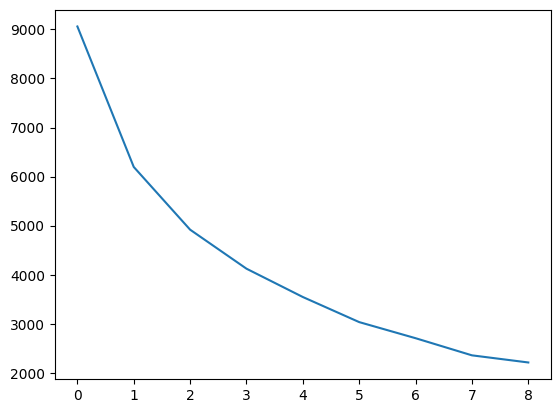

In [25]:
plt.plot(wcss)
plt.show()

K=4

In [26]:
kmeans=KMeans(n_clusters=4,n_init=10,random_state=42)

In [27]:
rfm['Cluster']=kmeans.fit_predict(x)

In [28]:
rfm.head(10)

,Recency,Frequency,Monetary Value,R_score,F_score,M_Score,Cluster
CustomerID,,,,,,,
12346,326,1,77183.60,1,1,5,1
12347,2,7,4310.00,5,3,4,0
12348,75,4,1797.24,3,3,3,1
12349,19,1,1757.55,5,1,3,3
12350,310,1,334.40,1,1,2,2
12352,36,8,2506.04,4,3,4,0
12353,204,1,89.00,2,1,1,2
12354,232,1,1079.40,2,1,3,1
12355,214,1,459.40,2,1,2,2


In [29]:
cluster_summary=rfm.groupby('Cluster').agg({'R_score':'mean','F_score':'mean','M_Score':'mean'}).reset_index()

In [30]:
cluster_summary

,Cluster,R_score,F_score,M_Score
0,0,4.669811,3.188679,3.764151
1,1,3.027290,1.893762,3.115984
2,2,1.442263,1.061201,1.505774
3,3,3.878194,1.083475,1.602215


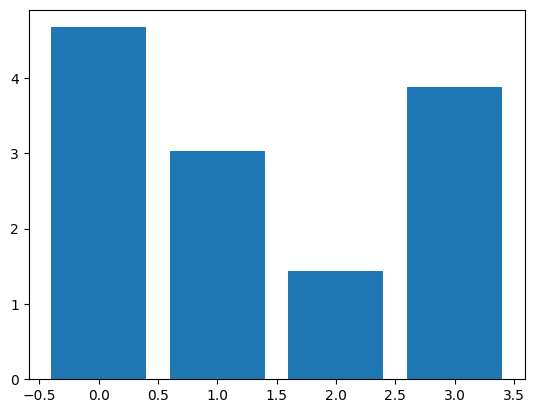

In [31]:
plt.bar(cluster_summary.index,cluster_summary['R_score'])
plt.show()

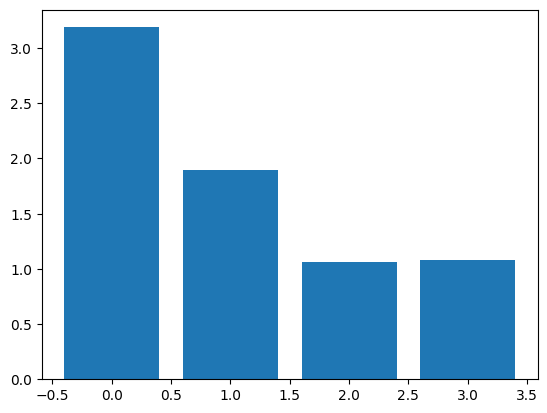

In [32]:
plt.bar(cluster_summary.index,cluster_summary['F_score'])
plt.show()

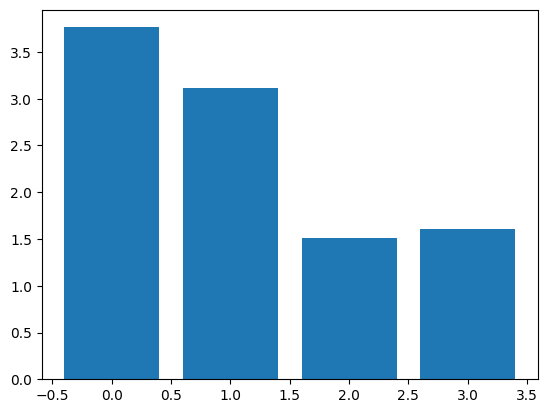

In [33]:
plt.bar(cluster_summary.index,cluster_summary['M_Score'])
plt.show()

In [34]:
cluster_count=rfm['Cluster'].value_counts()
precentage_customers=(cluster_count/cluster_count.sum())*100
precentage_customers

0    29.322268
3    27.063163
1    23.651452
2    19.963117
Name: Cluster, dtype: float64

([<matplotlib.patches.Wedge at 0x7f5c608cc4c0>,
 [Text(0.6653636107200968, 0.8759516342410212, 'Champions(Power Shoppers)'),
  Text(-0.9909669020183404, 0.47747732836667034, 'Loyal Customers'),
  Text(-0.45511142483057826, -1.0014357647840828, 'At-risk Customers'),
  Text(0.8906671285302292, -0.6455323897030391, 'Recent Customers')],
 [Text(0.36292560584732547, 0.4777918004951024, '29.3%'),
  Text(-0.5405274011009129, 0.2604421791090929, '27.1%'),
  Text(-0.24824259536213356, -0.546237689882227, '23.7%'),
  Text(0.4858184337437613, -0.35210857620165764, '20.0%')])

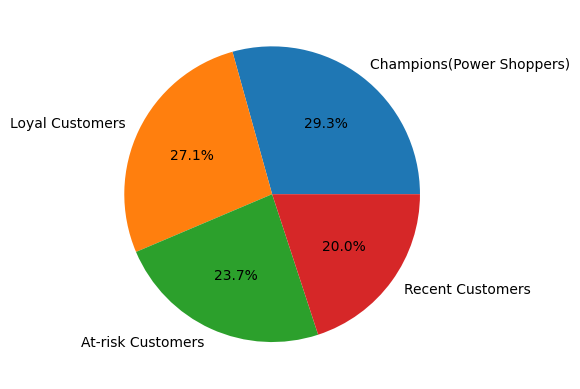

In [35]:
labels = ['Champions(Power Shoppers)','Loyal Customers','At-risk Customers','Recent Customers']

plt.pie(precentage_customers,labels=labels, autopct='%1.1f%%')

In [36]:
rfm.head()

,Recency,Frequency,Monetary Value,R_score,F_score,M_Score,Cluster
CustomerID,,,,,,,
12346,326,1,77183.60,1,1,5,1
12347,2,7,4310.00,5,3,4,0
12348,75,4,1797.24,3,3,3,1
12349,19,1,1757.55,5,1,3,3
12350,310,1,334.40,1,1,2,2


In [37]:
kmeans.predict([[5,1,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3], dtype=int32)

In [38]:
x_new=[[20],[300],[4000]]
y=[]
y[0:2]=bins(x_new[0],x_new[1],x_new[2])
# Flatten the nested list
y2= [val for sublist in y for val in sublist]
y2

[5, 5, 4]

In [43]:
with open('bins_function.pkl', 'wb') as file:
    pickle.dump(bins, file)

In [47]:
with open('bins_function.pkl', 'rb') as file:
    stored_function = pickle.load(file)
result=[]
result[0:2] = stored_function(x_new[0],x_new[1],x_new[2])
results= [val for sublist in result for val in sublist]

In [48]:
kmeans.predict([results])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [40]:
import pickle
pickle.dump(kmeans,open('cust_seg.pkl','wb'))


In [41]:
pick_cust_seg=pickle.load(open('cust_seg.pkl','rb'))

In [42]:
pick_cust_seg.predict([y2])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [49]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
